In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram , plot_state_qsphere ,plot_bloch_vector
#from qiskit_textbook.tools import vector2latex

from qiskit_textbook.widgets import bloch_calc


In [13]:
!conda list -e > requirements.txt

# 1

In [14]:

def create_state_generation_circuit(phi,theta):

    state_generation_circuit = QuantumCircuit(1)
    state_generation_circuit.ry(theta,0)
    state_generation_circuit.rz(phi,0)
    
    return state_generation_circuit
    

In [15]:


state_generation_circuit = create_state_generation_circuit(np.pi,np.pi/2)

sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(state_generation_circuit, sv_sim)
statevec = job_sim.result().get_statevector()
#vector2latex(statevec, pretext="|\\psi\\rangle =")

In [16]:
statevec

array([ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j])

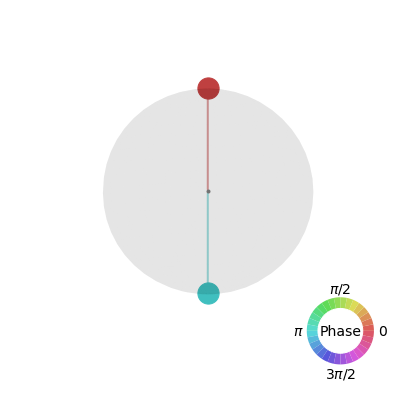

In [17]:

plot_state_qsphere(statevec.data)

In [18]:


state_generation_circuit = create_state_generation_circuit(np.pi,np.pi/2)

sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(state_generation_circuit, sv_sim)
statevec = job_sim.result().get_statevector()
#vector2latex(statevec, pretext="|\\psi\\rangle =")

In [19]:
#plot_bloch_vector(bloch_calc(statevec.data))

# 2

In [20]:
from qiskit.quantum_info import Statevector,random_statevector


In [21]:

def create_swap_test_circuit(psi):
    
    q = QuantumRegister(3)
    c = ClassicalRegister(1) # Changed from 9 to 1
    
    circuit = QuantumCircuit(q,c)
   
    circuit.initialize(psi,[1])
    
    circuit.h(0)
    circuit.cswap(0,1,2)
    circuit.h(0)
    circuit.measure(q[0],c)
    
    
    return circuit
    

In [22]:
rsv = random_statevector(2)
rsv

Statevector([-0.34128656-0.13952715j, -0.91948526+0.13639108j],
            dims=(2,))

In [23]:
swapcir = create_swap_test_circuit(rsv.data)

In [24]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [25]:

job = execute(swapcir,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(swapcir)

In [26]:
counts

{'0': 576, '1': 424}

In [27]:
swapcir.draw()

┌───┐                           ┌───┐┌─┐
q0_0: ───────────────────────┤ H ├─────────────────────────■─┤ H ├┤M├
      ┌──────────────────────┴───┴───────────────────────┐ │ └───┘└╥┘
q0_1: ┤ initialize(-0.34129+-0.13953j,-0.91949+0.13639j) ├─X───────╫─
      └──────────────────────────────────────────────────┘ │       ║ 
q0_2: ─────────────────────────────────────────────────────X───────╫─
                                                                   ║ 
c0_0: ═════════════════════════════════════════════════════════════╩═

In [28]:
swapcir = create_swap_test_circuit(np.array([0,1]))

In [29]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [30]:

job = execute(swapcir,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(swapcir)

In [31]:
counts

{'0': 528, '1': 472}

In [32]:
def create_blank_circuit():
    
    
    q = QuantumRegister(3)
    c = ClassicalRegister(1) # Changed from 9 to 1
    
    circuit = QuantumCircuit(q,c)
    
    return circuit
    

In [33]:
blank_circuit =create_blank_circuit()

In [34]:
generated_qc = blank_circuit.compose(state_generation_circuit, [2])

In [35]:
composed_qc = generated_qc.compose(swapcir)

In [36]:
composed_qc.draw()

┌───┐                    ┌───┐┌─┐
q2_0: ───────┤ H ├──────────────────■─┤ H ├┤M├
      ┌──────┴───┴──────┐           │ └───┘└╥┘
q2_1: ┤ initialize(0,1) ├───────────X───────╫─
      └───┬──────────┬──┘┌────────┐ │       ║ 
q2_2: ────┤ RY(pi/2) ├───┤ RZ(pi) ├─X───────╫─
          └──────────┘   └────────┘         ║ 
c2_0: ══════════════════════════════════════╩═

In [37]:

job = execute(composed_qc,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(composed_qc)

In [38]:
counts

{'0': 749, '1': 251}

In [39]:

state_generation_circuit = create_state_generation_circuit(0,np.pi)


In [40]:
blank_circuit =create_blank_circuit()

In [41]:
generated_qc = blank_circuit.compose(state_generation_circuit, [2])

In [42]:
composed_qc = generated_qc.compose(swapcir)

In [43]:
composed_qc.draw()

┌───┐                   ┌───┐┌─┐
q3_0: ───────┤ H ├─────────────────■─┤ H ├┤M├
      ┌──────┴───┴──────┐          │ └───┘└╥┘
q3_1: ┤ initialize(0,1) ├──────────X───────╫─
      └────┬────────┬───┘┌───────┐ │       ║ 
q3_2: ─────┤ RY(pi) ├────┤ RZ(0) ├─X───────╫─
           └────────┘    └───────┘         ║ 
c3_0: ═════════════════════════════════════╩═

In [44]:

def create_theta_estimation_circuit():

    circuit = QuantumCircuit(1)
    circuit.measure_all()
    
    return circuit
    

In [45]:
theta_estimation_circuit =create_theta_estimation_circuit()

In [46]:
theta_estimation_circuit.draw()

░ ┌─┐
   q_0: ─░─┤M├
         ░ └╥┘
meas_0: ════╩═

In [47]:
rsv =random_statevector(2)
rsv

Statevector([ 0.76171643-0.64627192j, -0.045943  -0.00315211j],
            dims=(2,))

In [48]:
q = QuantumRegister(1)
c =ClassicalRegister(1)

circuit = QuantumCircuit(q,c)
                         
                         

circuit.initialize(rsv.data,[0])

In [49]:
circuit.draw()

┌─────────────────────────────────────────────────────┐
q4_0: ┤ initialize(0.76172+-0.64627j,-0.045943+-0.0031521j) ├
      └─────────────────────────────────────────────────────┘
c4_0: ═══════════════════════════════════════════════════════

In [50]:
theta_estimation_circuit= circuit.compose(theta_estimation_circuit)

In [51]:
theta_estimation_circuit.draw()

┌─────────────────────────────────────────────────────┐ ░ ┌─┐
q4_0: ┤ initialize(0.76172+-0.64627j,-0.045943+-0.0031521j) ├─░─┤M├
      └─────────────────────────────────────────────────────┘ ░ └╥┘
c4_0: ═══════════════════════════════════════════════════════════╩═

In [52]:

job = execute(theta_estimation_circuit,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(theta_estimation_circuit)

In [53]:
counts

{'0': 999, '1': 1}

In [54]:

def create_phi_estimation_circuit():

    
    circuit = QuantumCircuit(1)
    circuit.h(0)
    circuit.measure_all()
    
    
    return circuit
    

In [55]:
phi_estimation_circuit = create_phi_estimation_circuit()

In [56]:
q = QuantumRegister(1)
c =ClassicalRegister(1)

circuit = QuantumCircuit(q,c)
                         
                         

circuit.initialize(rsv.data,[0])

In [57]:
phi_estimation_circuit= circuit.compose(phi_estimation_circuit)

In [58]:
phi_estimation_circuit.draw()

┌─────────────────────────────────────────────────────┐┌───┐ ░ ┌─┐
q5_0: ┤ initialize(0.76172+-0.64627j,-0.045943+-0.0031521j) ├┤ H ├─░─┤M├
      └─────────────────────────────────────────────────────┘└───┘ ░ └╥┘
c5_0: ════════════════════════════════════════════════════════════════╩═

In [59]:

job = execute(phi_estimation_circuit,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(phi_estimation_circuit)

In [60]:
counts

{'0': 478, '1': 522}

In [61]:
def estimate_paramters_on_base_Z(psi,n_measurements):
    
    
    theta_estimation_circuit =create_theta_estimation_circuit()    
    q = QuantumRegister(1)
    c =ClassicalRegister(1)
    circuit = QuantumCircuit(q,c)
            
    circuit.initialize(psi,[0])
    theta_estimation_circuit= circuit.compose(theta_estimation_circuit)
    job = execute(theta_estimation_circuit,simulator,shots = n_measurements)
    result = job.result()
    counts = result.get_counts(theta_estimation_circuit)

    beta = np.sqrt(counts['1'] /n_measurements)
    alpha = np.sqrt(1-(counts['1'] /n_measurements))
    
    return alpha,beta
    
    
    
    
    

In [62]:
def estimate_paramters_on_base_X(psi,n_measurements):
    
    phi_estimation_circuit= create_phi_estimation_circuit()
    
    q = QuantumRegister(1)
    c =ClassicalRegister(1)

    circuit = QuantumCircuit(q,c)
    circuit.initialize(psi,[0])
    
    
    phi_estimation_circuit= circuit.compose(phi_estimation_circuit)
    


    job = execute(phi_estimation_circuit,simulator,shots = n_measurements)
    result = job.result()
    counts = result.get_counts(phi_estimation_circuit)
    
    
    beta_X = counts['1'] /n_measurements
    
    return beta_X
    
    
    

In [63]:
def estimate_angles_for_state(psi,n_measurements):
    
    
    alpha,beta = estimate_paramters_on_base_Z(psi,n_measurements)
    theta_estimated = 2*np.arcsin(beta)

    
    beta_X =  estimate_paramters_on_base_X(psi,n_measurements)
    
    phi_estimated = 2*np.arccos(np.clip((beta_X - 1.)/(2*(-alpha*beta)),-1,1)   )

    
    
    return phi_estimated,theta_estimated
    
    
    
    
    
    
    

In [64]:
rsv =random_statevector(2).data
rsv

array([ 0.21205053-0.87921755j, -0.41484497-0.09957271j])

In [65]:
phi,theta = estimate_angles_for_state(rsv,1000)

In [66]:


state_generation_circuit = create_state_generation_circuit(phi,theta)

sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(state_generation_circuit, sv_sim)
statevec = job_sim.result().get_statevector()
#vector2latex(statevec, pretext="|\\psi\\rangle =")

In [67]:
statevec

array([ 0.90332718+0.j        , -0.0887708 +0.41966623j])

In [68]:
np.linalg.norm(np.vdot(rsv,statevec.data))

0.639128915350121

In [69]:
swapcir = create_swap_test_circuit(rsv)

In [70]:
blank_circuit =create_blank_circuit()

In [71]:
generated_qc = blank_circuit.compose(state_generation_circuit, [2])

In [72]:
composed_qc = generated_qc.compose(swapcir)

In [73]:
composed_qc.draw()

┌───┐                                         »
q9_0: ────────────────────────┤ H ├───────────────────────────────────────■─»
      ┌───────────────────────┴───┴───────────────────────┐               │ »
q9_1: ┤ initialize(0.21205+-0.87922j,-0.41484+-0.099573j) ├───────────────X─»
      └──────────────────┬─────────────┬──────────────────┘┌────────────┐ │ »
q9_2: ───────────────────┤ RY(0.88667) ├───────────────────┤ RZ(1.7793) ├─X─»
                         └─────────────┘                   └────────────┘   »
c9_0: ══════════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌───┐┌─┐
«q9_0: ┤ H ├┤M├
«      └───┘└╥┘
«q9_1: ──────╫─
«            ║ 
«q9_2: ──────╫─
«            ║ 
«c9_0: ══════╩═
«

In [74]:

job = execute(composed_qc,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(composed_qc)

In [75]:
counts

{'0': 704, '1': 296}

In [76]:
def reproduce_state(psi,n_measurements=1000,n_steps=300):
    
    phi,theta = estimate_angles_for_state(rsv,n_measurements)
    
    swapcir = create_swap_test_circuit(psi)
    state_generation_circuit = create_state_generation_circuit(phi,theta)
    
    generated_qc = blank_circuit.compose(state_generation_circuit, [2])
    composed_qc = generated_qc.compose(swapcir)

    job = execute(composed_qc,simulator,shots = n_steps)
    result = job.result()
    
    corr = 1-(1/(2*n_steps))*counts['1']
    
    return phi,theta,corr
    

In [77]:
reproduce_state(rsv)

(1.6537127622462162, 0.8918157779542166, 0.5066666666666666)

In [78]:
def repeated_swap_test_vs_rotgenstate(psi,phi,theta,n_steps=300):
    
    swapcir = create_swap_test_circuit(psi)
    state_generation_circuit = create_state_generation_circuit(phi,theta)
    
    generated_qc = blank_circuit.compose(state_generation_circuit, [2])
    composed_qc = generated_qc.compose(swapcir)

    job = execute(composed_qc,simulator,shots = n_steps)
    result = job.result()
    
    corr = 1-(1/(2*n_steps))*counts['1']
    
    return corr

In [79]:
def move_theta_right(psi,phi,theta, epsilon,num_swap_steps = 300):
    

    updated_theta = theta + epsilon

    updated_corr = repeated_swap_test_vs_rotgenstate(psi,phi,updated_theta)
    
    
    return updated_corr,updated_theta
    
def move_theta_left(psi,phi,theta, epsilon,num_swap_steps = 300):
    

    updated_theta = theta - epsilon

    updated_corr = repeated_swap_test_vs_rotgenstate(psi,phi,updated_theta)
    
    return updated_corr,updated_theta
        
def move_phi_right(psi,phi,theta, epsilon,num_swap_steps = 300):


    updated_phi = phi + epsilon

    updated_corr = repeated_swap_test_vs_rotgenstate(psi,updated_phi,theta)

    return updated_corr,updated_phi

def move_phi_left(psi,phi,theta, epsilon,num_swap_steps = 300):

    updated_phi = phi - epsilon

    updated_corr = repeated_swap_test_vs_rotgenstate(psi,updated_phi,theta)


    return updated_corr,updated_phi

In [80]:
def refine_parameters(psi,phi,theta,epsilon,current_correlation):
        
        current_best_corr = current_correlation
        
        updated_corr,updated_theta = move_theta_right(psi,phi,theta, epsilon)

        if updated_corr > current_best_corr:


            while updated_corr > current_best_corr:

                current_best_corr = updated_corr
                theta=updated_theta


                updated_corr,updated_theta = move_theta_right(psi,phi,theta, epsilon)


        else :


            updated_corr,updated_theta = move_theta_left(psi,phi,theta, epsilon)

            while updated_corr > current_best_corr:

                current_best_corr = updated_corr
                theta=updated_theta


                updated_corr,updated_theta = move_theta_left(psi,phi,theta, epsilon)



        updated_corr,updated_phi = move_phi_right(psi,phi,theta, epsilon)

        if updated_corr > current_best_corr:

            while updated_corr > current_best_corr:

                current_best_corr =updated_corr
                phi = updated_phi

                updated_corr,updated_phi = move_phi_right(psi,phi,theta, epsilon)


        else :


            updated_corr,updated_phi = move_phi_left(psi,phi,theta, epsilon)


            while updated_corr > current_best_corr:

                current_best_corr = updated_corr
                phi = updated_phi

                updated_corr,updated_phi = move_phi_left(psi,phi,theta, epsilon)



        return current_best_corr,phi,theta

    








In [81]:
def refine_parameters_recursively(psi,phi,theta,current_correlation,epsilon=0.5,min_epsilon=0.005,debug =False):
    
    updated_epsilon = epsilon
    
    while updated_epsilon >= min_epsilon:
        
        current_correlation,phi,theta = refine_parameters(psi,phi,theta,updated_epsilon,current_correlation)
        if debug:
            print(current_correlation)
        current_correlation,phi,theta = refine_parameters(psi,phi,theta,updated_epsilon,current_correlation)
        if debug:
            print(current_correlation)
        
        current_correlation,phi,theta = refine_parameters(psi,phi,theta,updated_epsilon,current_correlation)
        if debug:
            print(current_correlation)
       
        if current_correlation ==1:
            break 
            
        updated_epsilon = updated_epsilon/2
        
    return   current_correlation,phi,theta 
    
    

# 3

In [82]:

def create_swap_multiplicative_binary_circuit(psi):
    
    N= int(np.log2(psi.shape[0]))
    
    q = QuantumRegister(1+2*N)
    #c = ClassicalRegister(N)
    c = [ ClassicalRegister(1) for _ in range(N) ]
    circuit = QuantumCircuit(q,*c)
    
    circuit.initialize(Statevector.from_label('0'*N).data,[i for i in range(N+1,2*N+1)])
    
    circuit.initialize(psi,[i for i in range(1,N+1)])
    
    
    for i in range(N):
    
        circuit.h(0)
        circuit.cswap(0,i+1,N+1+i)
        circuit.h(0)
        
        circuit.measure(q[0],c[i])
        
        circuit.ry(np.pi,0).c_if(c[i],0)
        circuit.barrier()
        
        
    return circuit
    

In [83]:
nqvec = Statevector.from_label('0101').data

In [84]:
nqvec.shape[0]

16

In [85]:
swap_multiplicative_circ = create_swap_multiplicative_binary_circuit(nqvec)

In [86]:
swap_multiplicative_circ.draw()

┌───┐                         ┌───┐┌─┐┌────────┐ ░ »
q13_0: ─────────────────────┤ H ├───────────────────────■─┤ H ├┤M├┤ RY(pi) ├─░─»
       ┌────────────────────┴───┴─────────────────────┐ │ └───┘└╥┘└───┬────┘ ░ »
q13_1: ┤0                                             ├─X───────╫─────┼──────░─»
       │                                              │ │       ║     │      ░ »
q13_2: ┤1                                             ├─┼───────╫─────┼──────░─»
       │  initialize(0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0) │ │       ║     │      ░ »
q13_3: ┤2                                             ├─┼───────╫─────┼──────░─»
       │                                              │ │       ║     │      ░ »
q13_4: ┤3                                             ├─┼───────╫─────┼──────░─»
       ├──────────────────────────────────────────────┤ │       ║     │      ░ »
q13_5: ┤0                                             ├─X───────╫─────┼──────░─»
       │                                              │         ║     │      ░ »
q13_6: ┤1                                             ├─────────╫─────┼──────░─»
       │  initialize(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) │         ║     │      ░ »
q13_7: ┤2                                             ├─────────╫─────┼──────░─»
       │                                              │         ║     │      ░ »
q13_8: ┤3                                             ├─────────╫─────┼──────░─»
       └──────────────────────────────────────────────┘         ║  ┌──┴──┐   ░ »
c13_0: ═════════════════════════════════════════════════════════╩══╡ = 0 ╞═════»
                                                                   └─────┘     »
c14_0: ════════════════════════════════════════════════════════════════════════»
                                                                               »
c15_0: ════════════════════════════════════════════════════════════════════════»
                                                                               »
c16_0: ════════════════════════════════════════════════════════════════════════»
                                                                               »
«       ┌───┐   ┌───┐┌─┐┌────────┐ ░ ┌───┐   ┌───┐┌─┐┌────────┐ ░ ┌───┐   ┌───┐»
«q13_0: ┤ H ├─■─┤ H ├┤M├┤ RY(pi) ├─░─┤ H ├─■─┤ H ├┤M├┤ RY(pi) ├─░─┤ H ├─■─┤ H ├»
«       └───┘ │ └───┘└╥┘└───┬────┘ ░ └───┘ │ └───┘└╥┘└───┬────┘ ░ └───┘ │ └───┘»
«q13_1: ──────┼───────╫─────┼──────░───────┼───────╫─────┼──────░───────┼──────»
«             │       ║     │      ░       │       ║     │      ░       │      »
«q13_2: ──────X───────╫─────┼──────░───────┼───────╫─────┼──────░───────┼──────»
«             │       ║     │      ░       │       ║     │      ░       │      »
«q13_3: ──────┼───────╫─────┼──────░───────X───────╫─────┼──────░───────┼──────»
«             │       ║     │      ░       │       ║     │      ░       │      »
«q13_4: ──────┼───────╫─────┼──────░───────┼───────╫─────┼──────░───────X──────»
«             │       ║     │      ░       │       ║     │      ░       │      »
«q13_5: ──────┼───────╫─────┼──────░───────┼───────╫─────┼──────░───────┼──────»
«             │       ║     │      ░       │       ║     │      ░       │      »
«q13_6: ──────X───────╫─────┼──────░───────┼───────╫─────┼──────░───────┼──────»
«                     ║     │      ░       │       ║     │      ░       │      »
«q13_7: ──────────────╫─────┼──────░───────X───────╫─────┼──────░───────┼──────»
«                     ║     │      ░               ║     │      ░       │      »
«q13_8: ──────────────╫─────┼──────░───────────────╫─────┼──────░───────X──────»
«                     ║     │      ░               ║     │      ░              »
«c13_0: ══════════════╬═════╪══════════════════════╬═════╪═════════════════════»
«                     ║  ┌──┴──┐                   ║     │                     »
«c14_0: ══════════════╩══╡ = 0 ╞═══════════════════╬═════╪═════════════════════»
«                        └─────┘                   ║  ┌──┴─

In [87]:
n_trials=10
job = execute(swap_multiplicative_circ,simulator,shots = n_trials,meas_level='single')
result = job.result()
counts = result.get_counts(swap_multiplicative_circ)

In [88]:
counts

{'1 1 1 0': 5, '1 0 1 0': 2, '1 0 1 1': 3}

In [103]:
def get_qubit_array_from_counts(counts):
    
    sample_key=list(counts.keys())[0]
    
    N =int(len(sample_key.split(' ')))
    total_measurements =sum( list(counts.values()) )
    
    qbts=np.zeros(N)

    for i in range(N):

            for key in counts.keys():

                if key.split(' ')[i] == '1':

                    qbts[i]+=counts[key]



    qbts = qbts/total_measurements       



    return  (~(qbts == 1) )*1



In [104]:
get_qubit_array_from_counts(counts)

array([0, 1, 0, 1])

so in general we get the following pipeline where we can alter the state of each single qubit this is different from the original in the sense that states are not represented in the product base, they are only a collection of the qubit states.  

n_trials can be tuned if needed.

In [105]:
bin_prod_state = '01011'

In [106]:
nqvec = Statevector.from_label(bin_prod_state).data

In [107]:
swap_multiplicative_circ = create_swap_multiplicative_binary_circuit(nqvec)

In [108]:
n_trials=10
job = execute(swap_multiplicative_circ,simulator,shots = n_trials,meas_level='single')
result = job.result()
counts = result.get_counts(swap_multiplicative_circ)

In [109]:
get_qubit_array_from_counts(counts)

array([0, 1, 0, 1, 1])